In [207]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import linregress
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from pysolar.solar import *
import datetime

In [209]:
# Importando o arquivo dat para o pandas e definindo seus tipos
df = pd.read_table('table1.dat', delimiter=',', skiprows=[0,2], dtype = 'string' ).drop(0)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric)
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], utc=True)


In [210]:
display(df)

,TIMESTAMP,RECORD,PTemp_C,AirTC_Avg,AirTC_Max,AirTC_Min,AirTC_Std,RH_Max,RH_Min,Rain_mm_Tot,...,CMP21_Global_T_C_Avg,CMP21_Global_T_C_Max,CMP21_Difuse_T_C_Avg,CMP21_Difuse_T_C_Max,Pyrh_Irrad_Avg,Pyrh_Irrad_Max,Pyrh_Irrad_Min,Pyrh_Irrad_Std,Pyrh_Temp_Avg,Pyrh_Temp_Max
1,2016-05-16 07:31:00+00:00,643470,19.49,21.81,21.89,21.76,0.037,79.44,78.35,0.0,...,21.55,21.55,21.25,21.28,232.0,242.5,220.7,6.554,28.99,29.03
2,2016-05-16 07:32:00+00:00,643471,19.57,21.72,21.76,21.62,0.033,78.35,77.71,0.0,...,21.62,21.64,21.29,21.33,203.9,220.7,191.0,9.770,29.08,29.15
3,2016-05-16 07:33:00+00:00,643472,19.65,21.59,21.66,21.52,0.038,77.71,77.40,0.0,...,21.65,21.73,21.37,21.37,187.1,190.2,185.6,1.156,29.17,29.19
4,2016-05-16 07:34:00+00:00,643473,19.73,21.48,21.55,21.42,0.032,77.95,77.44,0.0,...,21.71,21.73,21.38,21.46,198.6,205.8,187.1,5.413,29.24,29.28
5,2016-05-16 07:35:00+00:00,643474,19.81,21.46,21.52,21.38,0.029,78.42,77.88,0.0,...,21.74,21.78,21.45,21.47,206.0,217.5,194.9,8.210,29.32,29.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305184,2017-04-19 08:02:00+00:00,1130224,24.78,23.26,23.32,23.22,0.023,73.32,72.03,0.0,...,24.01,24.07,26.54,26.58,106.4,116.9,100.6,4.199,32.83,32.87
305185,2017-04-19 08:03:00+00:00,1130225,24.81,23.12,23.25,23.05,0.042,72.78,71.72,0.0,...,24.06,24.07,26.56,26.58,191.6,381.2,118.5,79.250,32.85,32.91
305186,2017-04-19 08:04:00+00:00,1130226,24.92,23.15,23.19,23.08,0.029,72.64,71.96,0.0,...,24.07,24.07,26.58,26.58,361.6,415.5,302.4,39.420,32.92,33.00
305187,2017-04-19 08:05:00+00:00,1130227,25.07,23.15,23.22,23.08,0.032,72.57,71.69,0.0,...,24.11,24.16,26.58,26.58,423.3,457.6,384.3,23.940,32.99,33.04


In [109]:
df.columns

Index(['TIMESTAMP', 'RECORD', 'PTemp_C', 'AirTC_Avg', 'AirTC_Max', 'AirTC_Min',
       'AirTC_Std', 'RH_Max', 'RH_Min', 'Rain_mm_Tot', 'WS_ms_Avg',
       'WS_ms_Max', 'WS_ms_Min', 'WS_ms_Std', 'WindDir', 'BP_kPa_Avg',
       'BP_kPa_Max', 'BP_kPa_Min', 'BP_kPa_Std', 'TdC_Avg', 'TdC_Max',
       'TdC_Min', 'TdC_Std', 'Slr_Irrad_Global_Avg', 'Slr_Irrad_Global_Max',
       'Slr_Irrad_Global_Min', 'Slr_Irrad_Global_Std', 'Slr_Irrad_Difuse_Avg',
       'Slr_Irrad_Difuse_Max', 'Slr_Irrad_Difuse_Min', 'Slr_Irrad_Difuse_Std',
       'CMP21_Global_T_C_Avg', 'CMP21_Global_T_C_Max', 'CMP21_Difuse_T_C_Avg',
       'CMP21_Difuse_T_C_Max', 'Pyrh_Irrad_Avg', 'Pyrh_Irrad_Max',
       'Pyrh_Irrad_Min', 'Pyrh_Irrad_Std', 'Pyrh_Temp_Avg', 'Pyrh_Temp_Max'],
      dtype='object')

In [215]:
# Adicionando variáveis solares
df['DNI'] = df['Slr_Irrad_Global_Avg'] - df['Slr_Irrad_Difuse_Avg']
display(df['DNI'])



latitude = 37.7510
longitude = -97.8220

print(get_altitude(latitude, longitude, df['TIMESTAMP'].iloc[1]))

1          65.3
2          58.1
3          54.2
4          58.2
5          61.1
          ...  
305184     55.7
305185     95.9
305186    174.5
305187    204.6
305188    232.7
Name: DNI, Length: 305188, dtype: float64

TypeError: an integer is required

In [138]:
# Selecionando o Target
y = df.DNI

# Selecionando as Features
features = ['PTemp_C','AirTC_Avg','RH_Max','WS_ms_Avg','WindDir','BP_kPa_Avg','TdC_Avg']
X = df[features]

In [139]:
# Descrição das Features
X.describe()

,PTemp_C,AirTC_Avg,RH_Max,WS_ms_Avg,WindDir,BP_kPa_Avg,TdC_Avg
count,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000,305188.000000
mean,24.691502,23.317181,78.307749,1.525990,171.394922,101.514227,18.912155
std,5.801248,3.929265,14.620356,1.138673,111.177733,0.522624,3.245629
min,10.490000,11.630000,18.790000,0.000000,0.000000,99.200000,6.764000
25%,20.720000,20.720000,69.080000,0.612000,63.020000,101.200000,17.150000
50%,23.610000,23.150000,81.400000,1.292000,176.800000,101.500000,19.480000
75%,28.360000,25.680000,90.500000,2.262000,270.600000,101.900000,21.380000
max,43.050000,37.560000,98.300000,8.240000,354.600000,103.200000,26.110000


In [140]:
# Primeiros dados
X.head()

,PTemp_C,AirTC_Avg,RH_Max,WS_ms_Avg,WindDir,BP_kPa_Avg,TdC_Avg
1,19.49,21.81,79.44,0.206,337.8,101.3,17.98
2,19.57,21.72,78.35,0.449,338.3,101.3,17.74
3,19.65,21.59,77.71,0.287,329.0,101.3,17.51
4,19.73,21.48,77.95,0.367,323.0,101.3,17.43
5,19.81,21.46,78.42,0.312,323.2,101.3,17.51


In [141]:
# Separando o treino da validação do modelo
from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=0)

# DECISION TREE
# Definindo o modelo
model = DecisionTreeRegressor(max_leaf_nodes=50000)
model.fit(train_X, train_y)


DecisionTreeRegressor(max_leaf_nodes=50000)

In [142]:
# Aplicando o modelo e pegando os valores de previsão
val_predictions = model.predict(val_X)
print(val_predictions)
print(val_y.values)

[6.19250000e+00 1.16770000e+02 1.25185000e+02 ... 5.81000000e+01
 5.74880000e+02 1.57303371e-02]
[  0.   117.86 125.07 ...  86.8  576.1    0.  ]


In [143]:
# MAE
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(val_y, val_predictions))

def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

37.72963193293523


In [144]:
# Encontrando melhores valores para leaf nodes
for max_leaf_nodes in [5, 50, 500, 5000, 50000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  92
Max leaf nodes: 50  		 Mean Absolute Error:  74
Max leaf nodes: 500  		 Mean Absolute Error:  60
Max leaf nodes: 5000  		 Mean Absolute Error:  46
Max leaf nodes: 50000  		 Mean Absolute Error:  37


In [145]:
# Tabela de resultados
tabela_comparativa = pd.DataFrame(val_y)
tabela_comparativa['Prediction'] = val_predictions
tabela_comparativa['Error'] = abs(tabela_comparativa['Prediction'] - tabela_comparativa['DNI'])

tabela_comparativa = tabela_comparativa.sort_index()
display(tabela_comparativa)

,DNI,Prediction,Error
15,110.7,105.400000,5.300000
25,87.4,94.100000,6.700000
29,114.8,0.000000,114.800000
30,101.2,0.000000,101.200000
33,95.6,0.000000,95.600000
...,...,...,...
305176,34.9,71.800000,36.900000
305177,42.0,71.800000,29.800000
305178,58.4,71.800000,13.400000
305186,174.5,0.236364,174.263636


slope: 0.878840, intercept: 12.797684
R-squared: 0.781518
Mean Absolute Error (MAE): 33.210639 W/m²
Root Mean Squared Error (RMSE): 115.434367 W/m²
Features utilizadas: 
- PTemp_C
- AirTC_Avg
- RH_Max
- WS_ms_Avg
- WindDir
- BP_kPa_Avg
- TdC_Avg


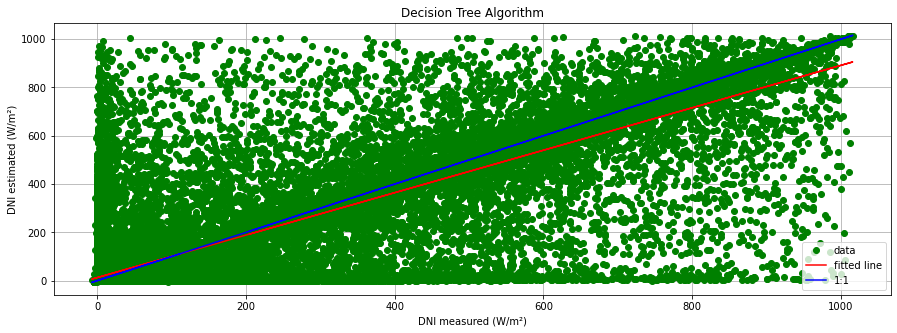

In [147]:
# Análise dos resultados
y= tabela_comparativa['Prediction']
x= tabela_comparativa['DNI']

rmse = mean_squared_error(y, x)**(1/2)


# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("Mean Absolute Error (MAE): %f W/m²" % mae)
print("Root Mean Squared Error (RMSE): %f W/m²" % rmse)
print("Features utilizadas: ")
for feature in features:
    print('- ' + feature)

plt.figure(figsize=(15, 5))
plt.plot(x, y, 'o', label='data', c='green')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, x, 'b', label='1:1')
plt.title("Decision Tree Algorithm")
plt.xlabel("DNI measured (W/m²)")
plt.ylabel("DNI estimated (W/m²)")
plt.legend()
plt.grid()
plt.show()


<ipython-input-182-58db407571f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela2['y'] = df['DNI']
<ipython-input-182-58db407571f2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela2['Predict'] = model.predict(tabela2[features])


<AxesSubplot:title={'center':'Comparação modelo vs medido'}, ylabel='DNI (W/m²)'>

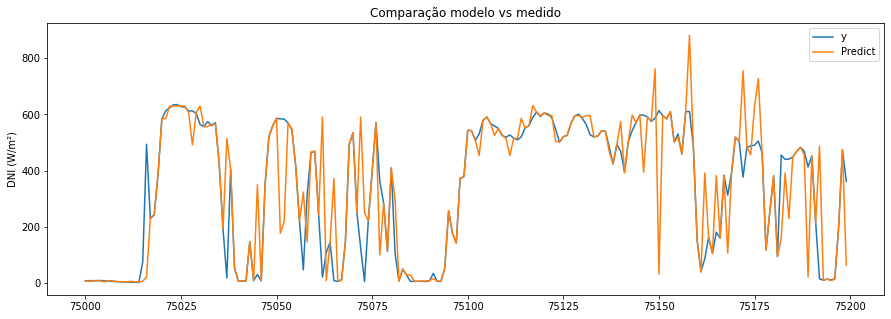

In [182]:
# Gráfico comparativo
tabela2 = X
tabela2['y'] = df['DNI']

tabela2 = tabela2.iloc[-76297:]
tabela2['Predict'] = model.predict(tabela2[features])
tabela2 = tabela2.reset_index()

tabela2[75000:75200].plot(y=['y','Predict'], use_index=True, figsize=(15,5), ylabel='DNI (W/m²)', title='Comparação modelo vs medido')


In [120]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)
predictions = rf_model.predict(val_X)
mae = mean_absolute_error(val_y, predictions)



In [124]:
print(mae)
tabela_comparativa = pd.DataFrame(val_y)
tabela_comparativa['Prediction'] = predictions
tabela_comparativa['Error'] = abs(tabela_comparativa['Prediction'] - tabela_comparativa['DNI'])

tabela_comparativa = tabela_comparativa.sort_index()
display(tabela_comparativa)

33.210639164430106


,DNI,Prediction,Error
15,110.7,46.58164,64.11836
25,87.4,50.12750,37.27250
29,114.8,63.47100,51.32900
30,101.2,46.38180,54.81820
33,95.6,38.21500,57.38500
...,...,...,...
305176,34.9,64.86680,29.96680
305177,42.0,137.26910,95.26910
305178,58.4,84.02730,25.62730
305186,174.5,90.44233,84.05767


In [125]:
tabela_comparativa.describe()

,DNI,Prediction,Error
count,76297.000000,76297.000000,76297.000000
mean,122.016081,120.903315,33.210639
std,240.349485,219.327215,71.165796
min,-7.500000,-4.316200,0.000000
25%,0.000000,0.235950,0.140630
50%,0.000000,5.147420,3.629330
75%,80.900000,119.877000,29.067000
max,1015.900000,1000.585900,803.096000


slope: 0.862988, intercept: 15.604855
R-squared: 0.894358
Mean Absolute Error (MAE): 33.210639 W/m²
Root Mean Squared Error (RMSE): 78.533118 W/m²
Features utilizadas: 
- PTemp_C
- AirTC_Avg
- RH_Max
- WS_ms_Avg
- WindDir
- BP_kPa_Avg
- TdC_Avg


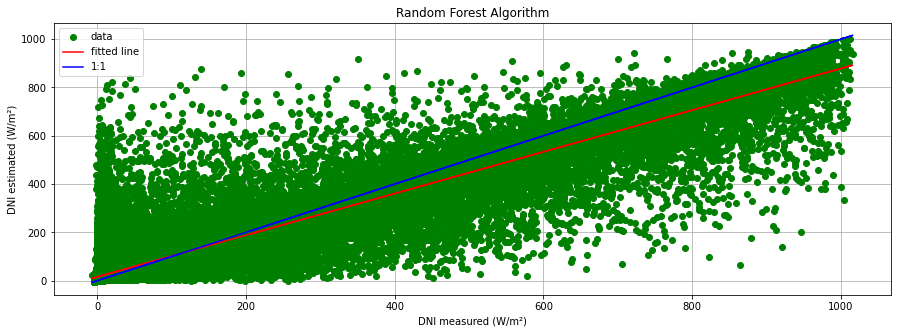

In [127]:
# Análise dos resultados
y= tabela_comparativa['Prediction']
x= tabela_comparativa['DNI']

rmse = mean_squared_error(y, x)**(1/2)


# Regressão linear
slope, intercept, r_value, p_value, std_err = linregress(x, y)
print("slope: %f, intercept: %f" % (slope, intercept))
print("R-squared: %f" % r_value**2)
print("Mean Absolute Error (MAE): %f W/m²" % mae)
print("Root Mean Squared Error (RMSE): %f W/m²" % rmse)
print("Features utilizadas: ")
for feature in features:
    print('- ' + feature)

plt.figure(figsize=(15, 5))
plt.plot(x, y, 'o', label='data', c='green')
plt.plot(x, intercept + slope*x, 'r', label='fitted line')
plt.plot(x, x, 'b', label='1:1')
plt.title("Random Forest Algorithm")
plt.xlabel("DNI measured (W/m²)")
plt.ylabel("DNI estimated (W/m²)")
plt.legend()
plt.grid()
plt.show()


<ipython-input-205-fedf2d31ed27>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_rf['y'] = df['DNI']
<ipython-input-205-fedf2d31ed27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela_rf['Predict'] = rf_model.predict(tabela_rf[features])


<AxesSubplot:title={'center':'Random Forest'}, ylabel='DNI (W/m²)'>

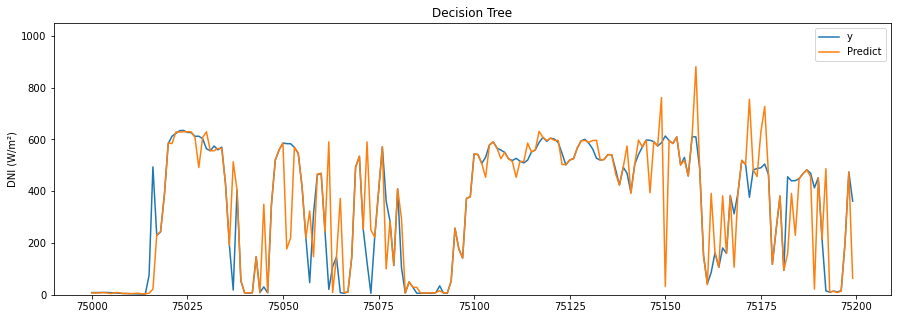

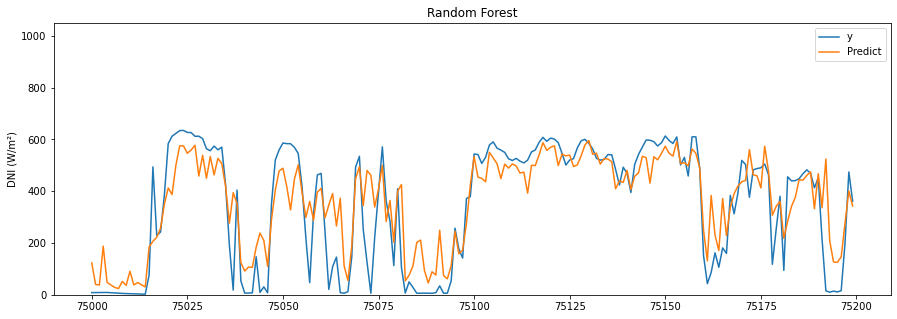

In [205]:
# Gráfico Comparativo
tabela_rf = X
tabela_rf['y'] = df['DNI']

tabela_rf = tabela_rf.iloc[-76297:]
tabela_rf['Predict'] = rf_model.predict(tabela_rf[features])
tabela_rf = tabela_rf.reset_index()

tabela2[75000:75200].plot(y=['y','Predict'], use_index=True, figsize=(15,5), ylabel='DNI (W/m²)', title='Decision Tree', ylim=[0,1050])
tabela_rf[75000:75200].plot(y=['y','Predict'], use_index=True, figsize=(15,5), ylabel='DNI (W/m²)', title='Random Forest', ylim=[0,1050])